**Nama : Ikhsan Al Fajar**

**NIM : 211351062**

**Kelas : Pagi B**

**Matkul : Machine Learning**

**Tugas Free UAS**

In [28]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ikhsanalfajar","key":"cd943f889af08e53aeff1b694cee17f6"}'}

In [214]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [215]:
!kaggle datasets download -d thedevastator/global-video-game-sales

global-video-game-sales.zip: Skipping, found more recently modified local copy (use --force to force download)


In [216]:
!mkdir global-video-game-sales
!unzip global-video-game-sales.zip -d global-video-game-sales
!ls global-video-game-sales

mkdir: cannot create directory ‘global-video-game-sales’: File exists
Archive:  global-video-game-sales.zip
replace global-video-game-sales/vgsales.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: vgsales.csv


In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [218]:
df = pd.read_csv('global-video-game-sales/vgsales.csv')

In [219]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<Axes: >

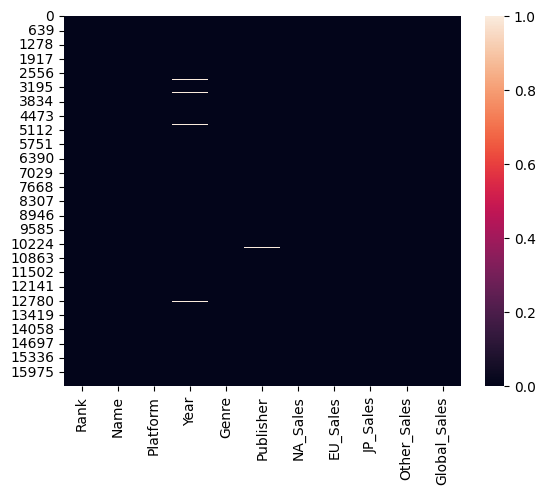

In [226]:
sns.heatmap(df.isnull())

In [227]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<ipython-input-228-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

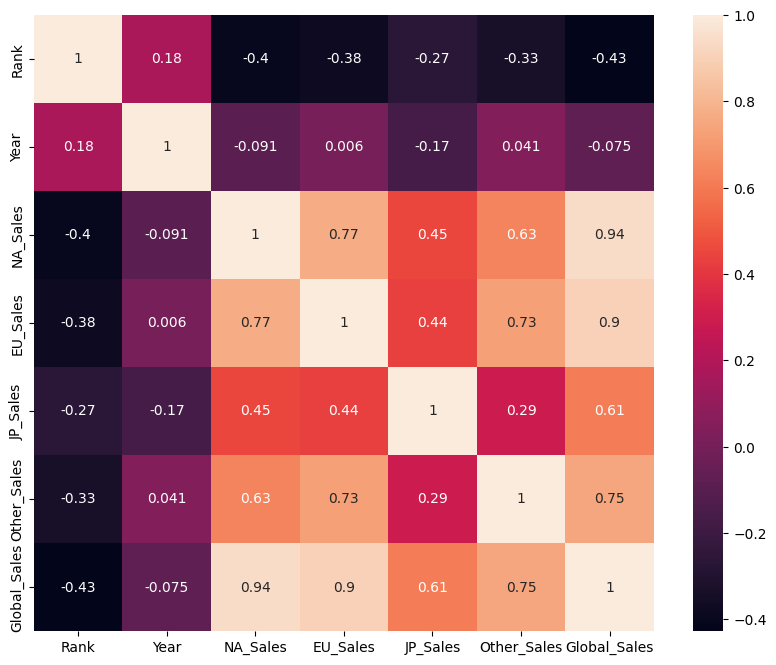

In [228]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [257]:
game = df.groupby('Year').count()[['Name']].sort_values(by='Name').reset_index()
game = game.rename(columns={'Name':'market'})

<Axes: xlabel='Year', ylabel='market'>

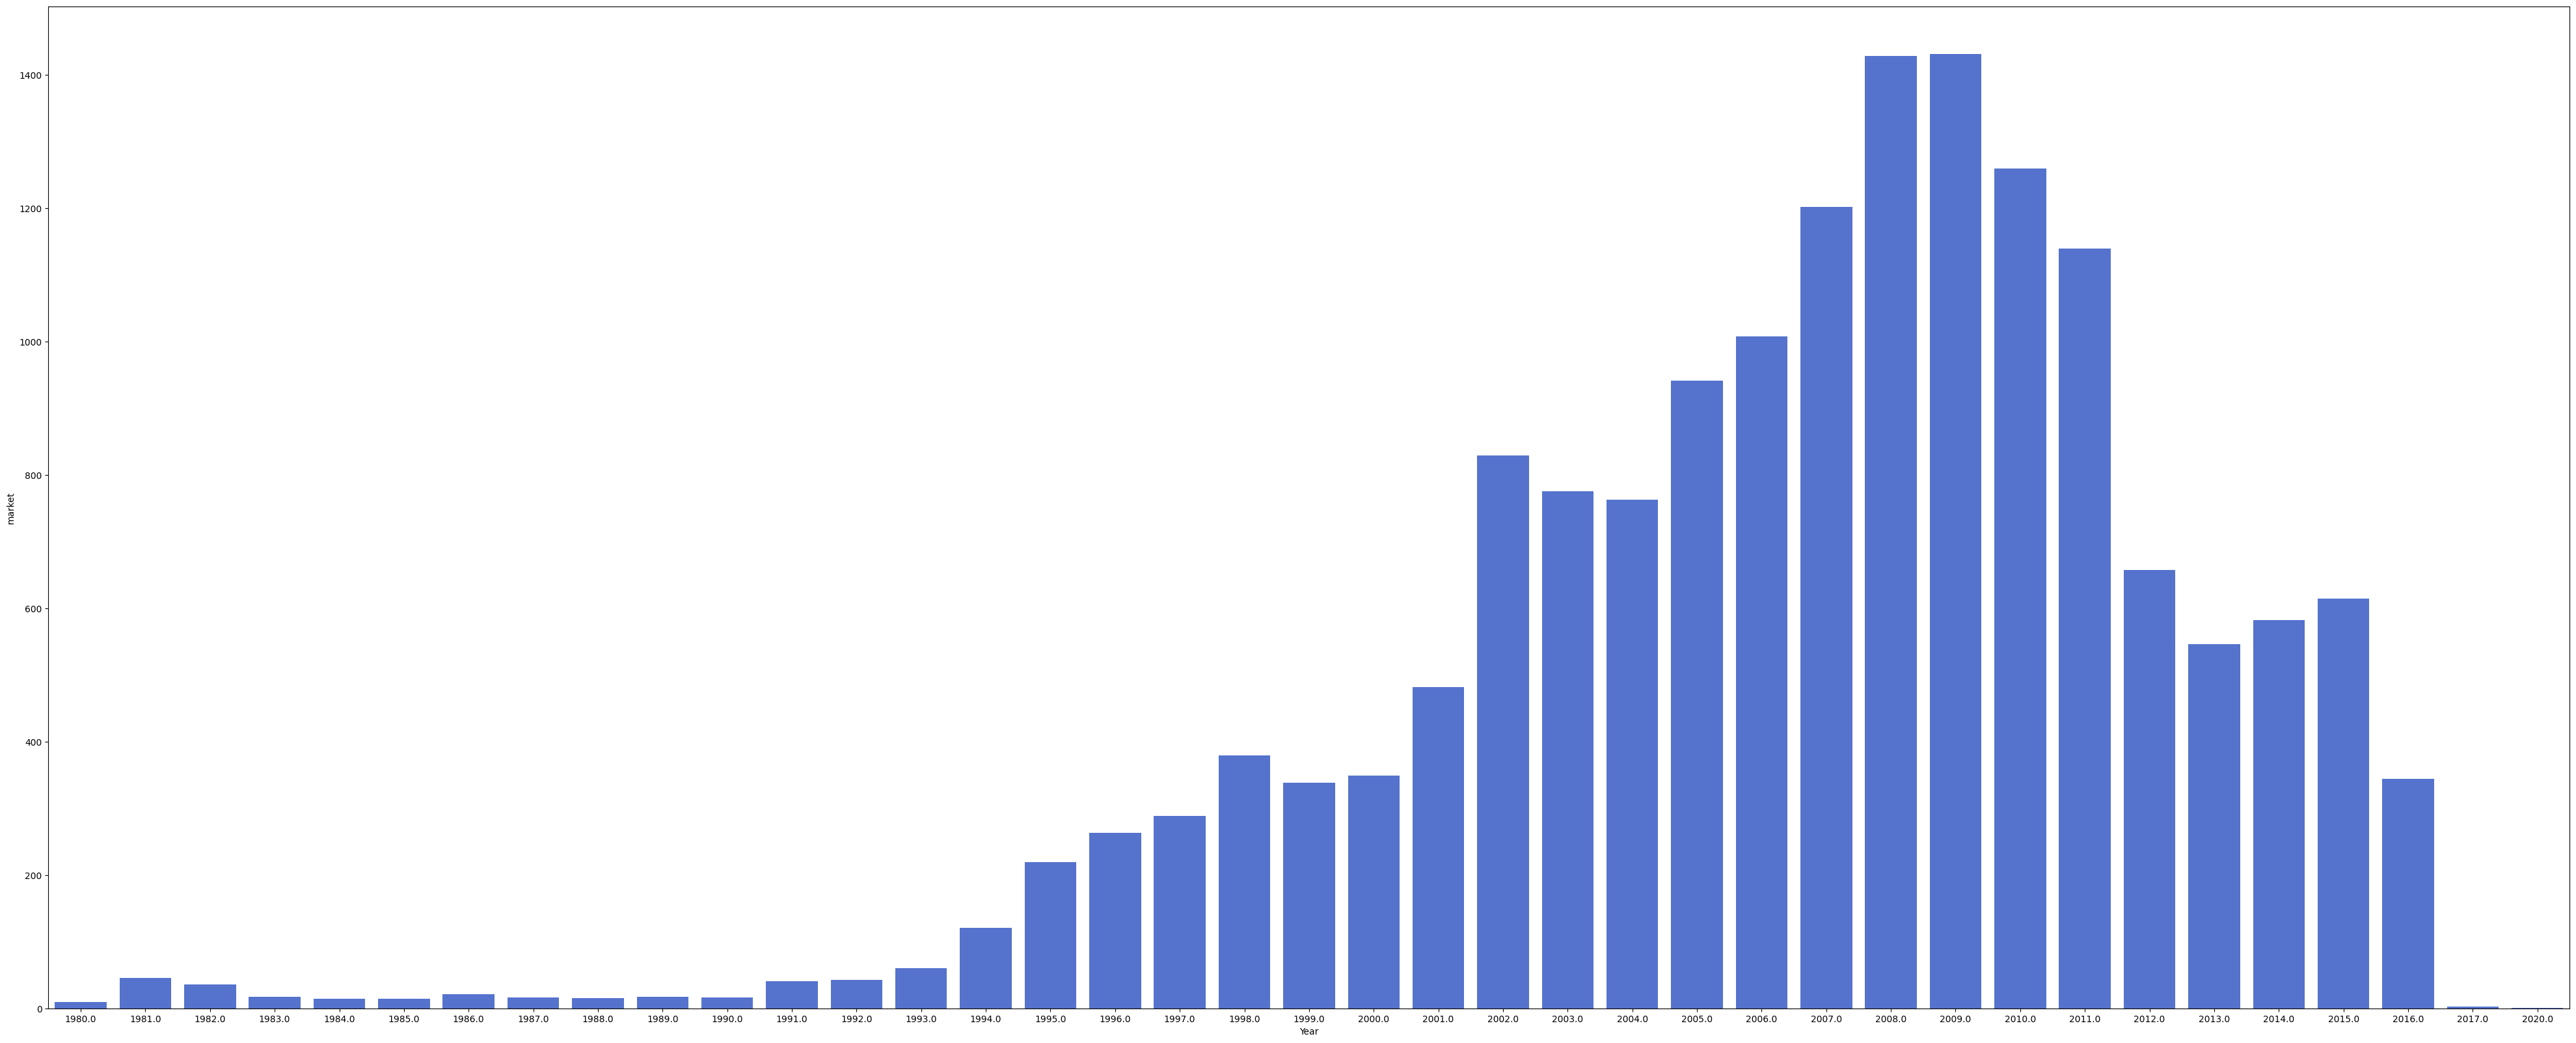

In [269]:
plt.figure(figsize=(50,20))
sns.barplot(x=game['Year'], y=game['market'], color='royalblue')

In [278]:
view_house = df.groupby('EU_Sales').count()[['Publisher']].sort_values(by='Publisher',ascending=True).reset_index()
view_house = view_house.rename(columns={'Publisher':'market'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

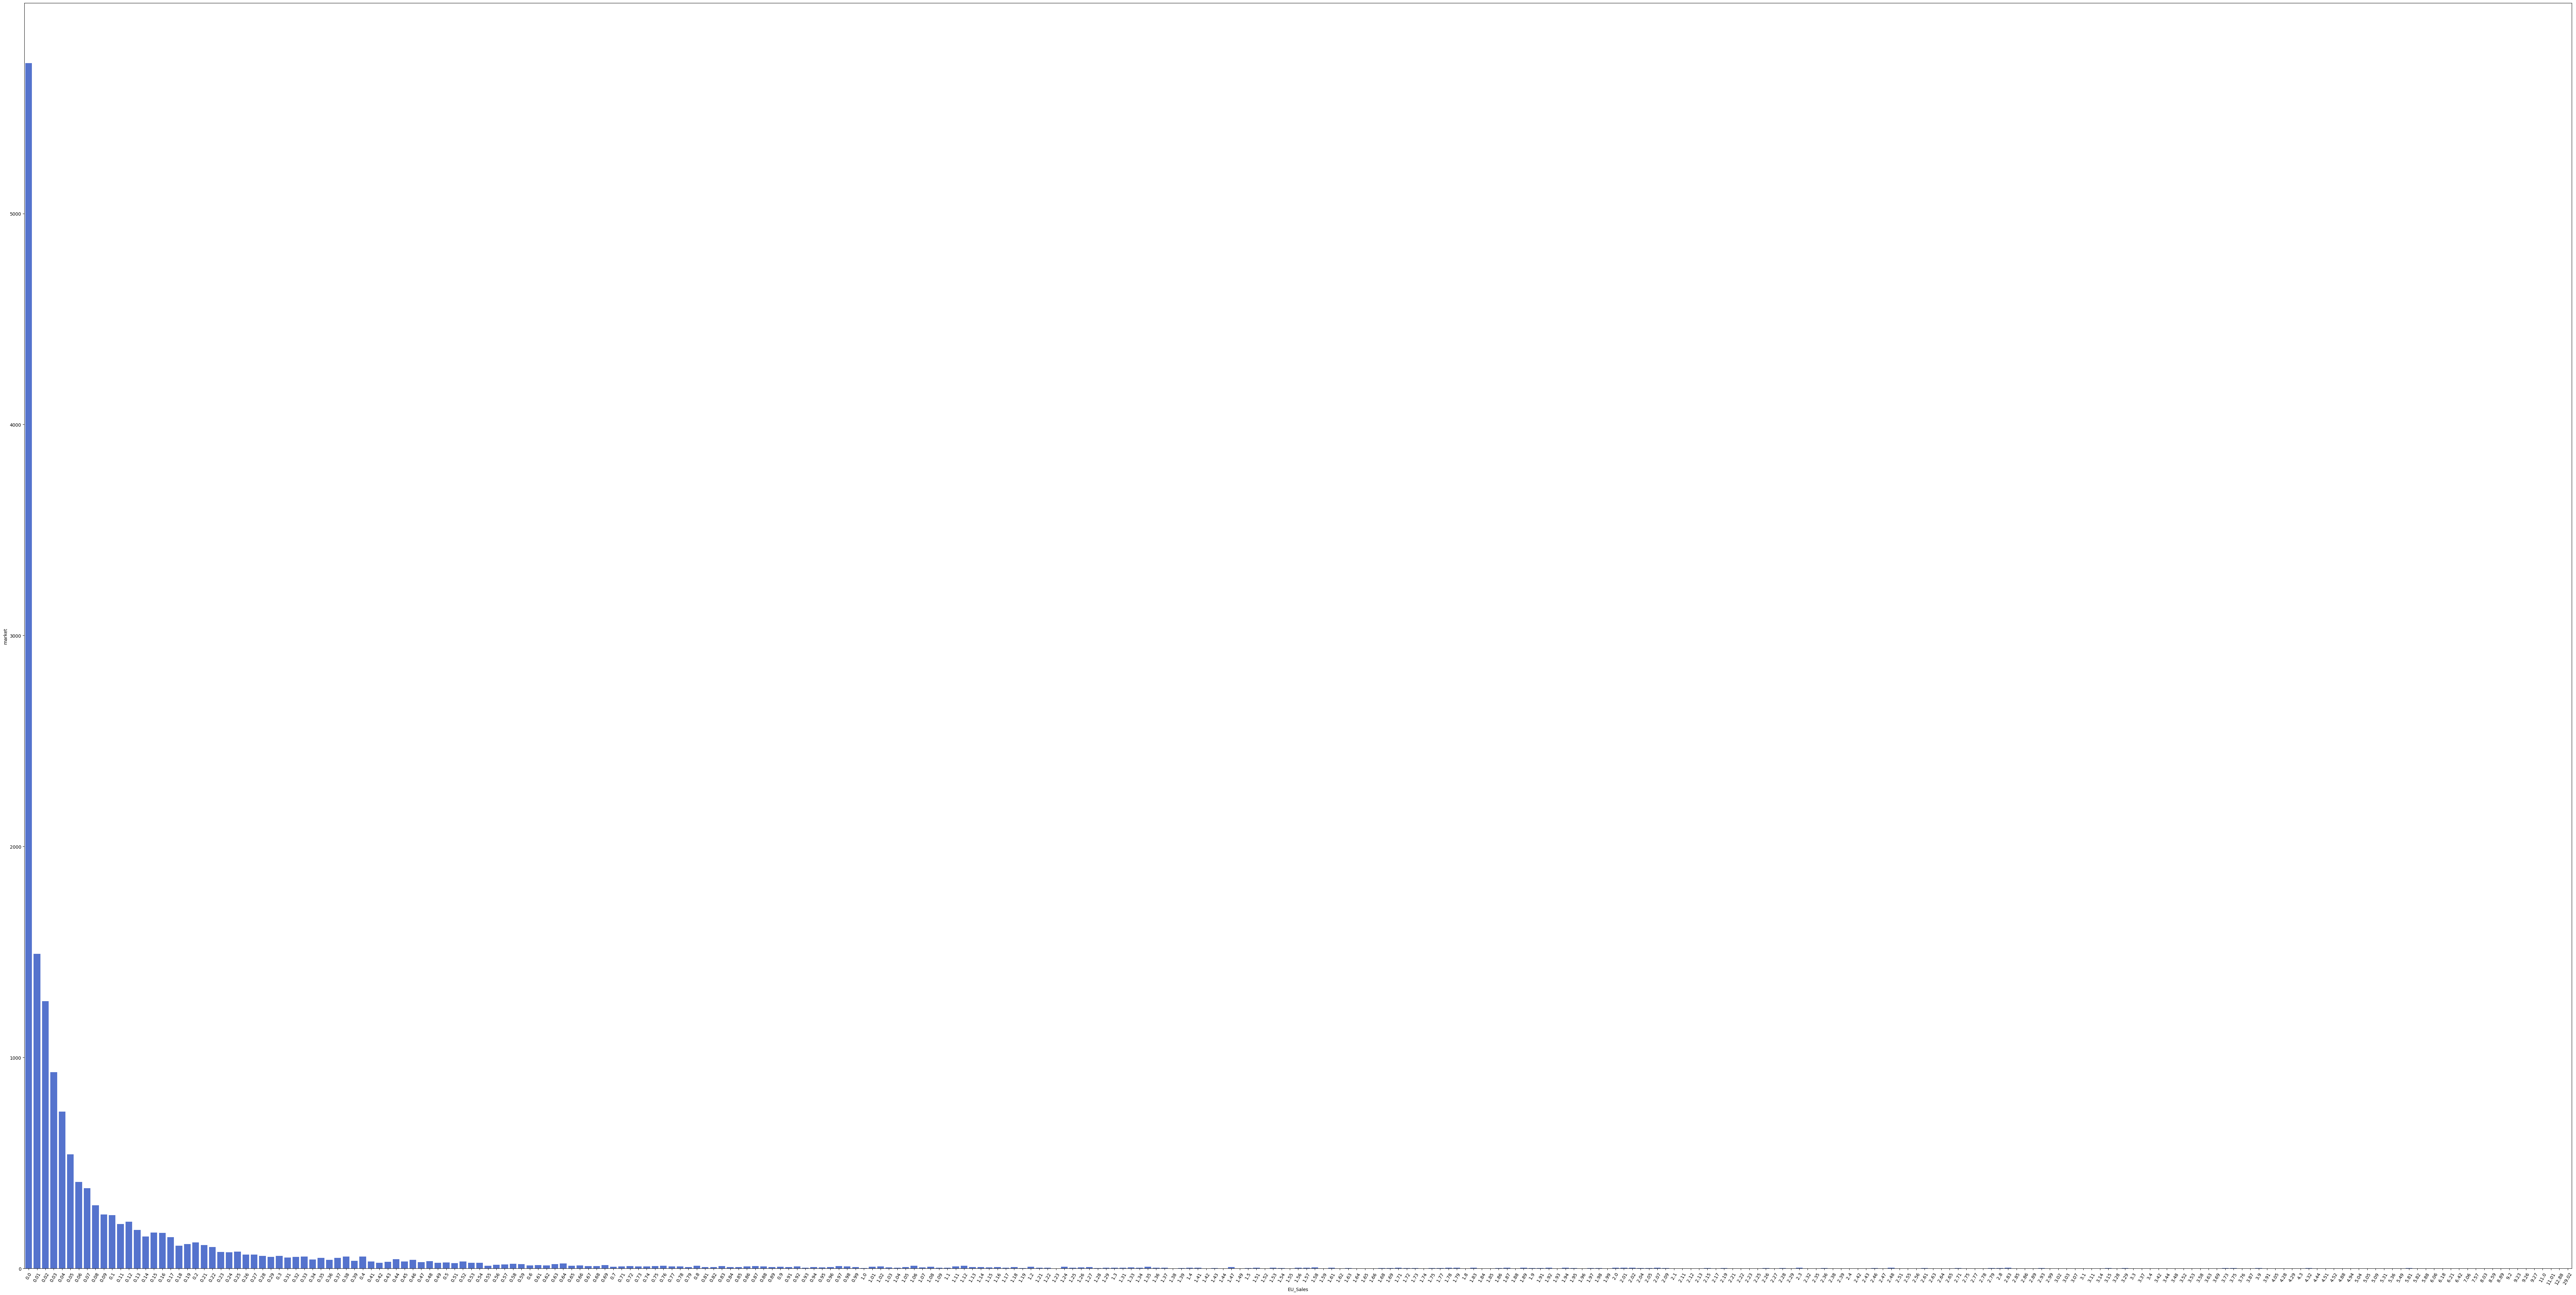

In [279]:
fig = plt.figure(figsize=(100,50))
sns.barplot(x=view_house['EU_Sales'], y=view_house['market'], color='royalblue')
plt.xticks(rotation=60)

In [274]:
features = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
x = df[features]
y = df['Global_Sales']
x.shape, y.shape

((16598, 4), (16598,))

In [275]:
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(4150,)

In [276]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [280]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9999906916890886


In [284]:
input_data = np.array([[29.08,3.58,6.81,0.77]])

prediction = lr.predict(input_data)
print('Estimasi Global Sales :', prediction)

Estimasi Global Sales : [40.23703673]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [285]:
import pickle

filename = 'estimasi_global_sales_vidio_game.sav'
pickle.dump(lr,open(filename,'wb'))